# DNN Regression
Compare the performance of a linear regression model to a fully connected  ANN on a non-linear dataset

In [2]:
#imports
import numpy as np
import pandas as pd

import random
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

### Prepare Data

In [113]:
#Create a random dataset 
n_points = 1000000

x1 = np.linspace(-10,20.0,n_points)
np.random.shuffle(x1) #Shuffle data so X1 and X2 are not correlated
print(x1)

x2= np.linspace(10,40.0,n_points)
print(x2)

noise = np.random.randn(n_points)
print(noise)

[-5.17107517 12.14338214  9.30672931 ... 14.71366471  5.90979591
  8.15007815]
[10.      10.00003 10.00006 ... 39.99994 39.99997 40.     ]
[ 0.93347387 -0.28854945 -1.25617511 ...  1.98944673 -0.03582729
  1.90205706]


In [134]:
#Create target variable that is not a linear function of the 
y_true = (0.5 * x1) -5*(x2) + x1**2 + 2*x1/x2 + 5 + noise
y_true

array([ -20.94626033,  110.67339064,   46.87343463, ...,   31.57419273,
       -156.85960163, -122.1916261 ])

In [127]:
data = pd.concat([pd.DataFrame(data=x1,columns=['X1']),pd.DataFrame(data=x2,columns=['X2']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)
data.head()

,X1,X2,Y
0,-5.171075,10.00000,-20.946260
1,12.143382,10.00003,110.673391
2,9.306729,10.00006,46.873435
3,0.179280,10.00009,-45.071218
4,18.367038,10.00012,304.957478


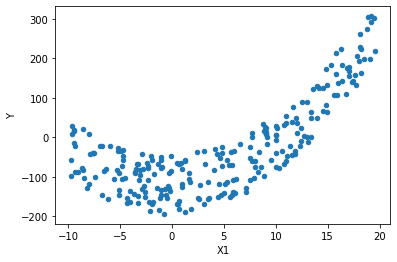

In [128]:
#No linear relationship is clear
data.sample(n=250).plot(kind='scatter',x='X1',y='Y')

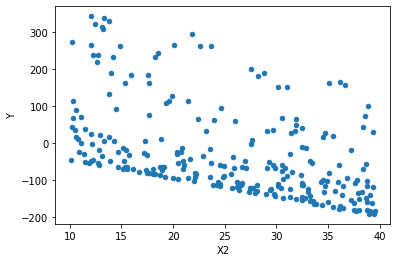

In [129]:
#No clear relationship
data.sample(n=250).plot(kind='scatter',x='X2',y='Y')

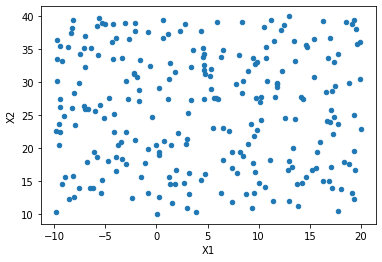

In [130]:
#x1 and x2 are uncorrelated
data.sample(n=250).plot(kind='scatter',x='X1',y='X2')

## Fit linear regression model

In [131]:
X = data[['X1','X2']] #start with just a linear model of X1 and X2
Y = data['Y']

results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.681
Model:                            OLS   Adj. R-squared (uncentered):              0.681
Method:                 Least Squares   F-statistic:                          1.066e+06
Date:                Sun, 05 Apr 2020   Prob (F-statistic):                        0.00
Time:                        17:25:40   Log-Likelihood:                     -5.6592e+06
No. Observations:             1000000   AIC:                                  1.132e+07
Df Residuals:                  999998   BIC:                                  1.132e+07
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1            10.9754      0.008   1393.412      0.000      10.960      10.991
X2            -3.1062      0.003  -1043.367      0.000      -3.112      -3.100
==============================================================================
Omnibus:                   118697.608   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81391.033
Skew:                           0.588   Prob(JB):                         0.00
Kurtosis:                       2.244   Cond. No.                         3.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

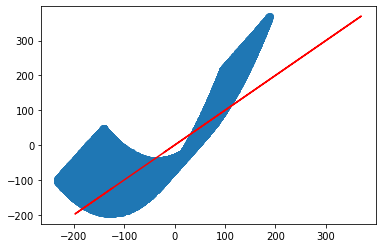

In [133]:
Y_pred = results.predict(X)

plt.scatter(x = Y_pred, y = Y) #Terrible fit
plt.plot(Y, Y,'r') 

#This is because you are trying to fit a linear model where the target vaiable does not have a 
#linear relationship with the explanitory variables 

### Add transformations and interactions
We can rewrite the function as a linear funciton by letting X3 = X1^2 and X4 = X1/X2
<br>
y_true =  0.5*X1 -5*X2 + X3 +2*X4 + 5 + noise
<br>

In [135]:
data['X3'] = x1**2
data['X4'] = x1/x2
data[['X1','X2','X3','X4']]

,X1,X2,X3,X4
0,-5.171075,10.00000,26.740018,-0.517108
1,12.143382,10.00003,147.461730,1.214335
2,9.306729,10.00006,86.615210,0.930667
3,0.179280,10.00009,0.032141,0.017928
4,18.367038,10.00012,337.348098,1.836682
...,...,...,...,...
999995,16.450216,39.99988,270.609621,0.411257
999996,-8.661039,39.99991,75.013591,-0.216526
999997,14.713665,39.99994,216.491929,0.367842
999998,5.909796,39.99997,34.925688,0.147745


In [136]:
X = data[['X1','X2','X3','X4']] #linear function but not a linear function of X1 and X2
Y = data['Y']

#r squard is a lot better 
#Figure out why parameters not the same as function 
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.267e+09
Date:                Sun, 05 Apr 2020   Prob (F-statistic):                        0.00
Time:                        17:29:36   Log-Likelihood:                     -1.9647e+06
No. Observations:             1000000   AIC:                                  3.929e+06
Df Residuals:                  999996   BIC:                                  3.929e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.3152      0.001    597.458      0.000       0.314       0.316
X2            -4.8300   8.75e-05  -5.52e+04      0.000      -4.830      -4.830
X3             1.0044   2.52e-05   3.99e+04      0.000       1.004       1.004
X4             5.6235      0.009    609.308      0.000       5.605       5.642
==============================================================================
Omnibus:                     4527.425   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4548.061
Skew:                           0.159   Prob(JB):                         0.00
Kurtosis:                       2.911   Cond. No.                         800.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

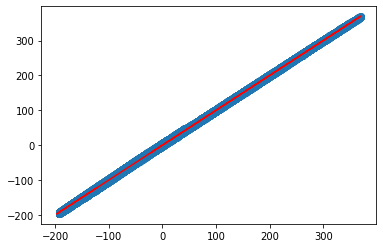

In [137]:
Y_pred = results.predict(X)

plt.scatter(x = Y_pred, y = Y)
plt.plot(Y, Y,'r') 

## Use DNN Regression

In [162]:
X = data[['X1','X2']] 
X = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
Y = data['Y']

In [163]:
feat_x1 = tf.feature_column.numeric_column('X1')
feat_x2 = tf.feature_column.numeric_column('X2')

feat_cols = [feat_x1,feat_x2]

In [180]:
#Model
dnn_model = tf.estimator.DNNRegressor(hidden_units=[500,500,500],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmp433fvgfs', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [181]:
#Imput funciton
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X,y=Y,batch_size=100,num_epochs=1,shuffle=True)

In [182]:
dnn_model.train(input_fn=input_func,steps=10000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmp433fvgfs/model.ckpt.
INFO:tensorflow:loss = 18147.725, step = 0
INFO:tensorflow:global_step/sec: 78.8708
INFO:tensorflow:loss = 9699.145, step = 100 (1.270 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 90.7125
INFO:tensorflow:loss = 0.9856417, step = 7300 (1.106 sec)
INFO:tensorflow:global_step/sec: 83.128
INFO:tensorflow:loss = 0.7697636, step = 7400 (1.200 sec)
INFO:tensorflow:global_step/sec: 86.9576
INFO:tensorflow:loss = 133.03485, step = 7500 (1.150 sec)
INFO:tensorflow:global_step/sec: 89.0194
INFO:tensorflow:loss = 17.113438, step = 7600 (1.124 sec)
INFO:tensorflow:global_step/sec: 87.786
INFO:tensorflow:loss = 6.614137, step = 7700 (1.139 sec)
INFO:tensorflow:global_step/sec: 89.2734
INFO:tensorflow:loss = 3.8770738, step = 7800 (1.120 sec)
INFO:tensorflow:global_step/sec: 74.4697
INFO:tensorflow:loss = 2.9351003, step = 7900 (1.344 sec)
INFO:tensorflow:global_step/sec: 71.9821
INFO:tensorflow:loss = 3.0241437, step = 8000 (1.389 sec)
INFO:tensorflow:global_step/sec: 87.0649
INFO:tensorflow:loss = 1.8442379, step = 8100 (1.148 sec)
INFO:tensorflow:global_step/sec: 90.7457
INFO:tensorflow:loss = 1.4495246, step = 8200 (1.102 sec)
INFO:tensorfl

In [183]:
#Evaluation funciton 
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
      x=X,
      y=Y,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [184]:
results = dnn_model.evaluate(eval_input_func)
print(results)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-05T18:12:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmp433fvgfs/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 295.71198s
INFO:tensorflow:Finished evaluation at 2020-04-05-18:17:01
INFO:tensorflow:Saving dict for 

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmp433fvgfs/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


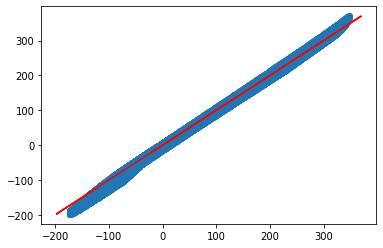

In [186]:
#DNN regressor automatically incorporates transformations and interactions
#However, reqires a lot more data
predictions = []
for x in dnn_model.predict(input_fn=eval_input_func):
    predictions.append(x['predictions'])
    
plt.scatter(x = predictions, y = Y)
plt.plot(Y, Y,'r') 

### Add transformations and interactions

In [176]:
X = data[['X1','X2','X3','X4']] 
X = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
Y = data['Y']

feat_x1 = tf.feature_column.numeric_column('X1')
feat_x2 = tf.feature_column.numeric_column('X2')
feat_x3 = tf.feature_column.numeric_column('X3')
feat_x4 = tf.feature_column.numeric_column('X4')


feat_cols = [feat_x1,feat_x2,feat_x3,feat_x4]

In [177]:
#Train model 
dnn_model = tf.estimator.DNNRegressor(hidden_units=[500,500,500],feature_columns=feat_cols)

input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X,y=Y,batch_size=100,num_epochs=1,shuffle=True)

dnn_model.train(input_fn=input_func,steps=10000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmp5gf2stn3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in f

INFO:tensorflow:loss = 1.4832498, step = 6200 (0.485 sec)
INFO:tensorflow:global_step/sec: 180.377
INFO:tensorflow:loss = 0.9859658, step = 6300 (0.555 sec)
INFO:tensorflow:global_step/sec: 215.981
INFO:tensorflow:loss = 0.8572197, step = 6400 (0.463 sec)
INFO:tensorflow:global_step/sec: 178.747
INFO:tensorflow:loss = 1.1960406, step = 6500 (0.560 sec)
INFO:tensorflow:global_step/sec: 186.038
INFO:tensorflow:loss = 1.1334108, step = 6600 (0.537 sec)
INFO:tensorflow:global_step/sec: 201.932
INFO:tensorflow:loss = 1.1692953, step = 6700 (0.495 sec)
INFO:tensorflow:global_step/sec: 202.996
INFO:tensorflow:loss = 1.0015607, step = 6800 (0.493 sec)
INFO:tensorflow:global_step/sec: 213.915
INFO:tensorflow:loss = 1.0825586, step = 6900 (0.467 sec)
INFO:tensorflow:global_step/sec: 206.346
INFO:tensorflow:loss = 1.2832112, step = 7000 (0.485 sec)
INFO:tensorflow:global_step/sec: 204.745
INFO:tensorflow:loss = 0.9677043, step = 7100 (0.488 sec)
INFO:tensorflow:global_step/sec: 200.352
INFO:tenso

In [178]:
#Evaluation funciton 
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
      x=X,
      y=Y,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

results = dnn_model.evaluate(eval_input_func)
print(results)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-05T18:04:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmp5gf2stn3/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 156.90938s
INFO:tensorflow:Finished evaluation at 2020-04-05-18:07:02
INFO:tensorflow:Saving dict for 

In [187]:
#Adding extra variables does not help improve accuracy 
predictions = []
for x in dnn_model.predict(input_fn=eval_input_func):
    predictions.append(x['predictions'])
    
plt.scatter(x = predictions, y = Y)
plt.plot(Y, Y,'r') 

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmp433fvgfs/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


KeyboardInterrupt: 